In [43]:
import matplotlib.pyplot as plt
from subprocess import check_output
import pandas as pd
from io import StringIO

img_path = '../dataset_retriever/tmp/48938a7c88b492e6.md-base-0.jpg'

image = plt.imread(img_path)


In [44]:
# run tesseract
out = StringIO(check_output(['tesseract', img_path, "-", "-l", "eng", "tsv"]).decode('utf-8'))

df = pd.read_table(out, sep='\t')

Estimating resolution as 244


In [45]:
print(df[(df['conf'] == 95 )& (df['width'] > 10) & (df['height'] > 10)])



Empty DataFrame
Columns: [level, page_num, block_num, par_num, line_num, word_num, left, top, width, height, conf, text]
Index: []


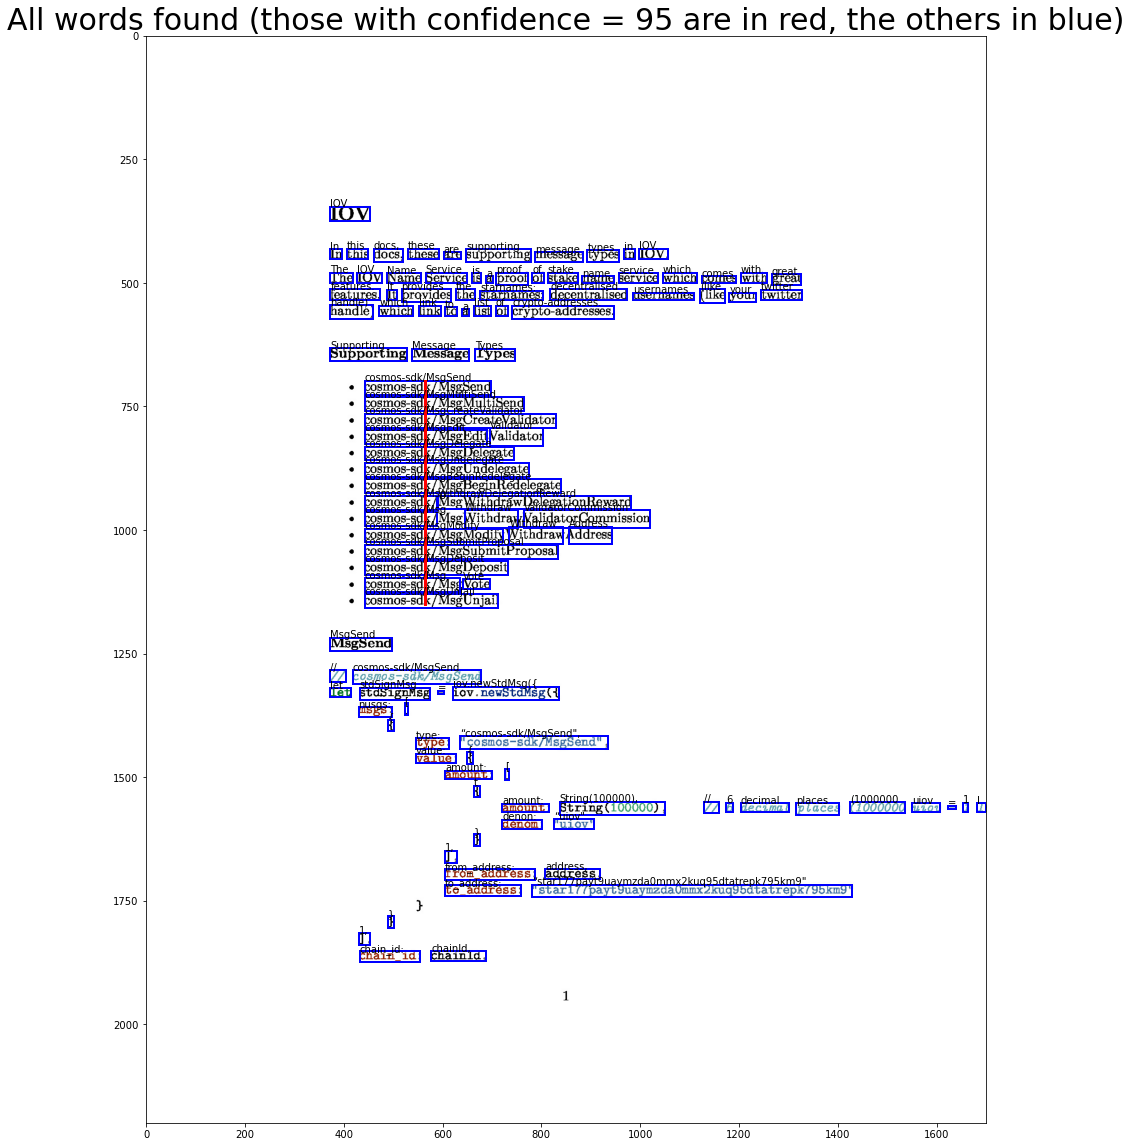

In [46]:
images = df[(df['level'] == 5)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], row['text'], fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor=('blue' if row['conf'] != 95 else 'red'), linewidth=2))

plt.title('All words found (those with confidence = 95 are in red, the others in blue)', fontsize=30)

plt.show()


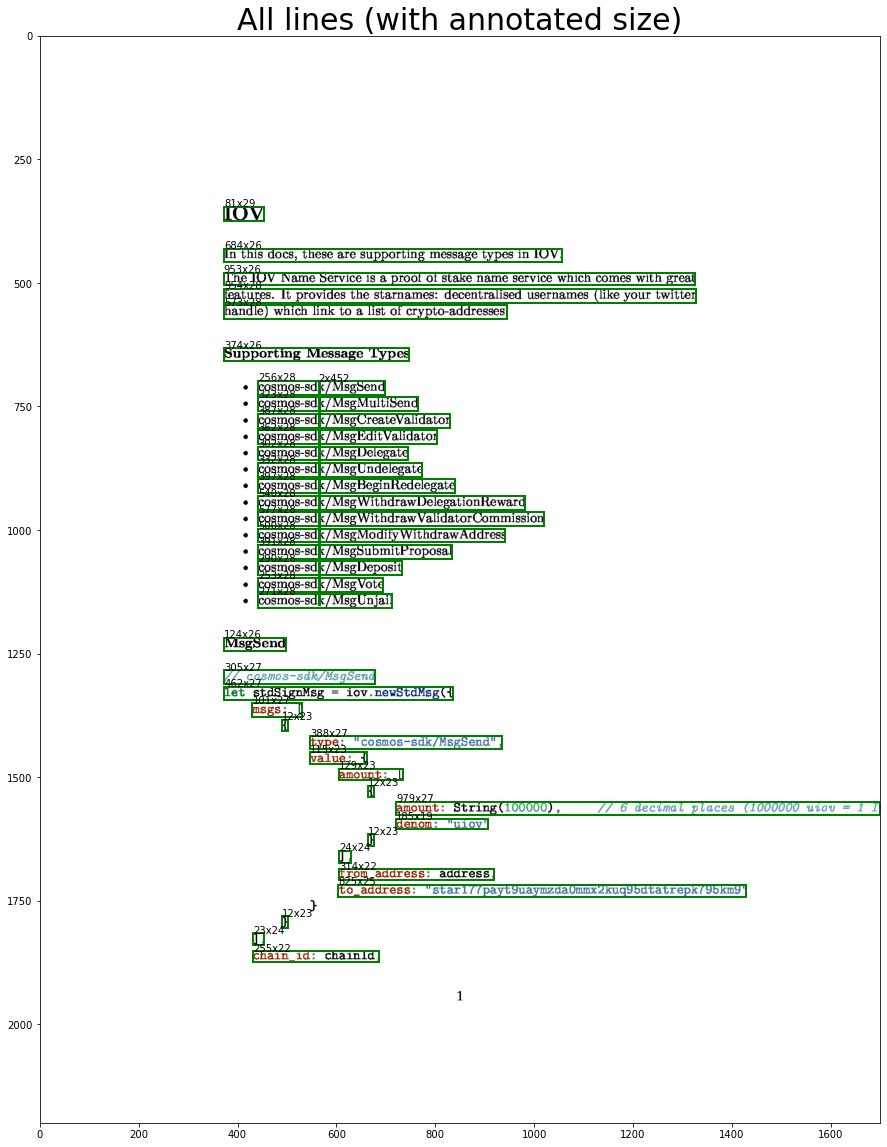

In [47]:
images = df[(df['level'] == 4)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All lines (with annotated size)', fontsize=30)

plt.show()


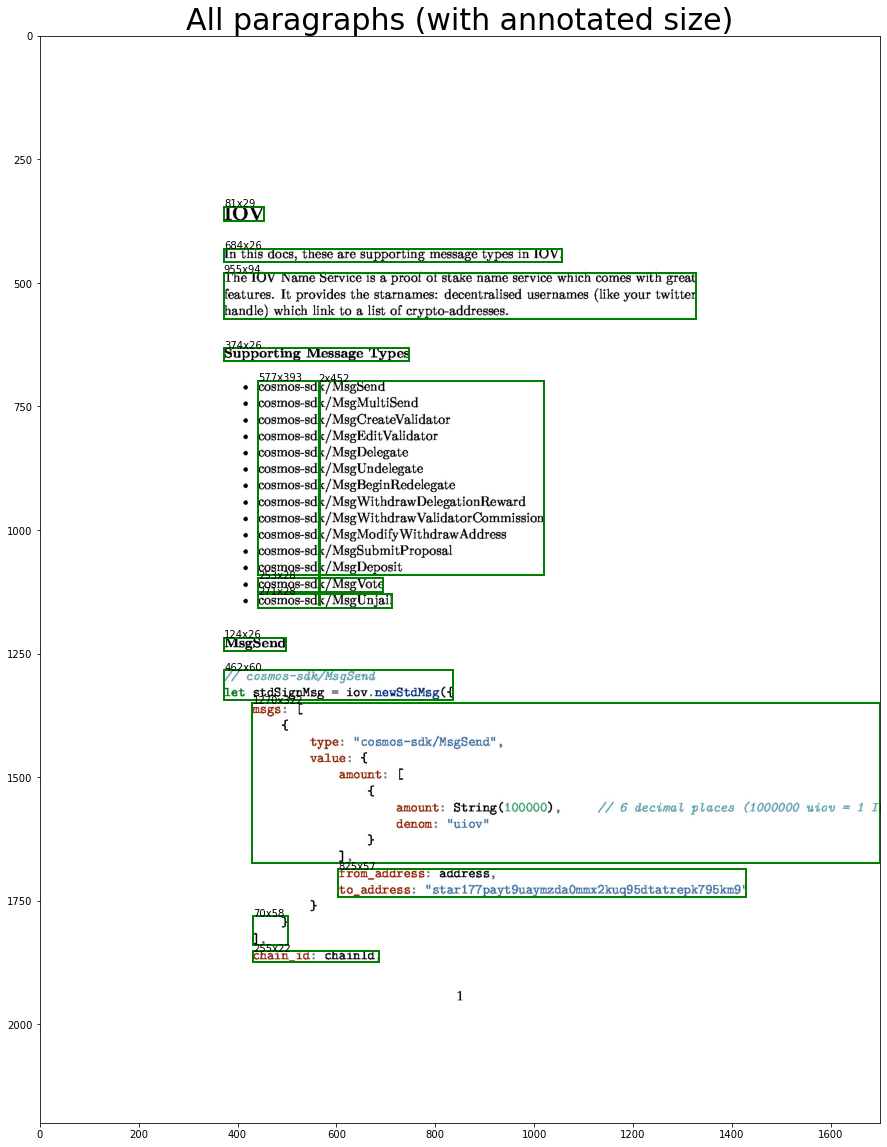

In [48]:
images = df[(df['level'] == 3)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All paragraphs (with annotated size)', fontsize=30)

plt.show()


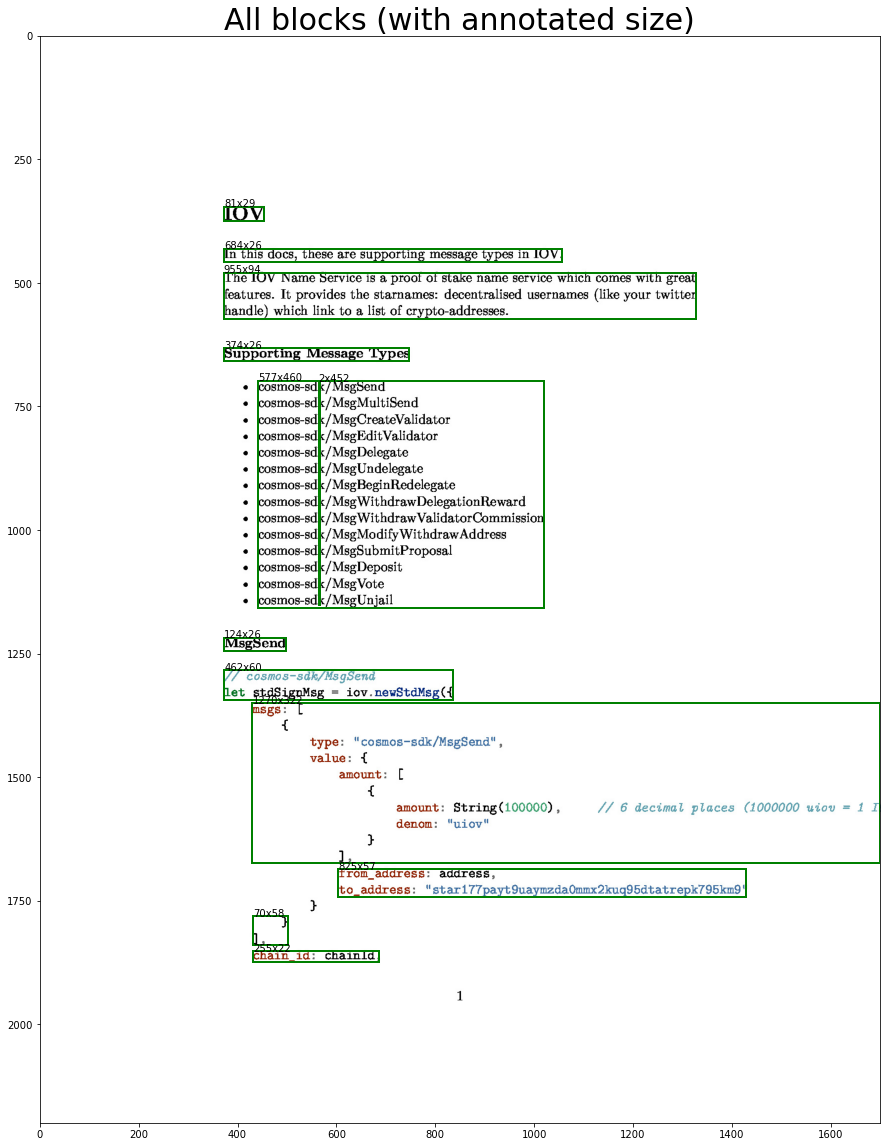

In [49]:
images = df[(df['level'] == 2)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All blocks (with annotated size)', fontsize=30)

plt.show()
